<a href="https://colab.research.google.com/github/Vaani64/MNIST-Digits-Classification/blob/main/MNSIT_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns
import numpy as np

np.random.seed(0)

Data

In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualization

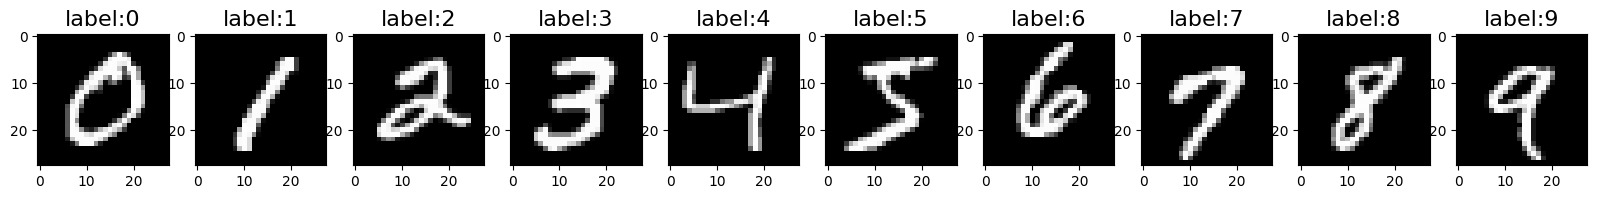

In [ ]:
num_classes=10
f,ax=plt.subplots(1,num_classes,figsize=(20,20))
for i in range(0,num_classes):
  sample=x_train[y_train==i][0]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title("label:{}".format(i),fontsize=16)



In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
#y_train=keras.utils.to_categorical(y_train,num_classes)
#y_test=keras.utils.to_categorical(y_test,num_classes)
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)


In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Prepare Data

In [ ]:
#Normalize data
x_train=x_train/255.0
x_test=x_test/255.0
#reshape data
x_train=x_train.reshape(x_train.shape[0],-1)  #flattering the data from 2d/3d to 1d
x_test=x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


Creating fully connected neural network

Dense: This is a fully connected layer where each neuron in the layer receives input from all neurons in the previous layer.\
units=128: The number of neurons in this layer is 128.\
input_shape=(784,): This specifies that the input to this layer will be a 1D vector of length 784. This is appropriate if your input data has been flattened (e.g., 28x28 images flattened into 784 features).\
activation='relu': ReLU (Rectified Linear Unit) is a common activation function that introduces non-linearity into the model. It outputs the input directly if it is positive; otherwise, it outputs zero.\
units=10: This specifies that the output layer has 10 neurons, one for each class in the classification problem.\
activation='softmax': The softmax activation function is used for multi-class classification problems. It converts the output into probabilities that sum to 1, with each value representing the probability of the input belonging to a particular class.\
loss='categorical_crossentropy': This specifies the loss function to be used. Categorical cross-entropy is used for multi-class classification problems where the target is a one-hot encoded vector.\
optimizer='adam': Adam (Adaptive Moment Estimation) is an optimizer that adapts the learning rate during training and is often effective in practice.\
metrics=['accuracy']: This specifies that accuracy should be used as a metric to evaluate the model's performance during training and testing.\
model.summary(): Prints a summary of the model’s architecture, including the number of parameters and the shape of the output at each layer. This helps in understanding the model’s complexity and verifying that the architecture is as expected.

In [ ]:
model=Sequential() #This creates a linear stack of layers
model.add(Dense(units=128,input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

train

In [ ]:
batch_size=512
epochs=10
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6887 - loss: 1.0455
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9288 - loss: 0.2457
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9504 - loss: 0.1685
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9610 - loss: 0.1339
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9681 - loss: 0.1091
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9712 - loss: 0.0946
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9745 - loss: 0.0846
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9787 - loss: 0.0692
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9821 - loss: 0.0616
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9836 - loss: 0.0563


evaluate

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("test loss:{},test accuracy:{}".format(test_loss,test_acc))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9719 - loss: 0.0906
test loss:0.0770375058054924,test accuracy:0.9764999747276306


In [ ]:
!pip install keras
from tensorflow.keras.utils import to_categorical

# One-hot encode y_test
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.9693302e-06 5.7488387e-06 2.4919299e-04 ... 9.9950260e-01
  3.6773654e-06 7.1251881e-05]
 [1.4932972e-07 5.5669243e-05 9.9993581e-01 ... 7.3782289e-08
  1.2546824e-06 7.5263418e-10]
 [1.0455581e-05 9.9812645e-01 2.5268967e-04 ... 9.1346836e-04
  1.3020406e-04 6.6420660e-05]
 ...
 [1.5317231e-10 8.3778157e-10 2.1233983e-09 ... 1.9959671e-06
  1.4233095e-07 4.3911714e-06]
 [1.3847394e-07 1.2951325e-08 5.9861255e-10 ... 2.6485727e-09
  2.1370526e-03 3.7510213e-09]
 [1.8461752e-07 4.0670192e-10 3.8560244e-09 ... 3.9259287e-11
  5.9854272e-10 4.1270680e-12]]
[7 2 1 ... 4 5 6]


an example

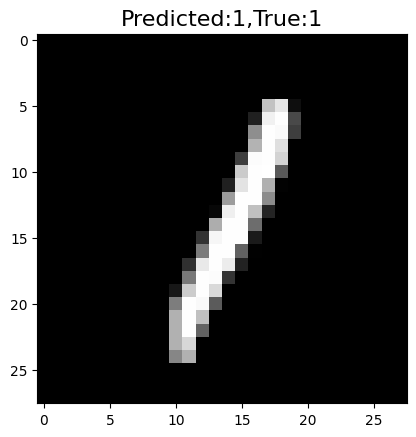

In [ ]:
random_idx=np.random.choice(len(x_test))
x_sample=x_test[random_idx]
y_true=np.argmax(y_test,axis=1)
y_sample_true=y_true[random_idx]
y_sample_pred_class=y_pred_classes[random_idx]

plt.title("Predicted:{},True:{}".format(y_sample_pred_class,y_sample_true),fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')


confusion matrix


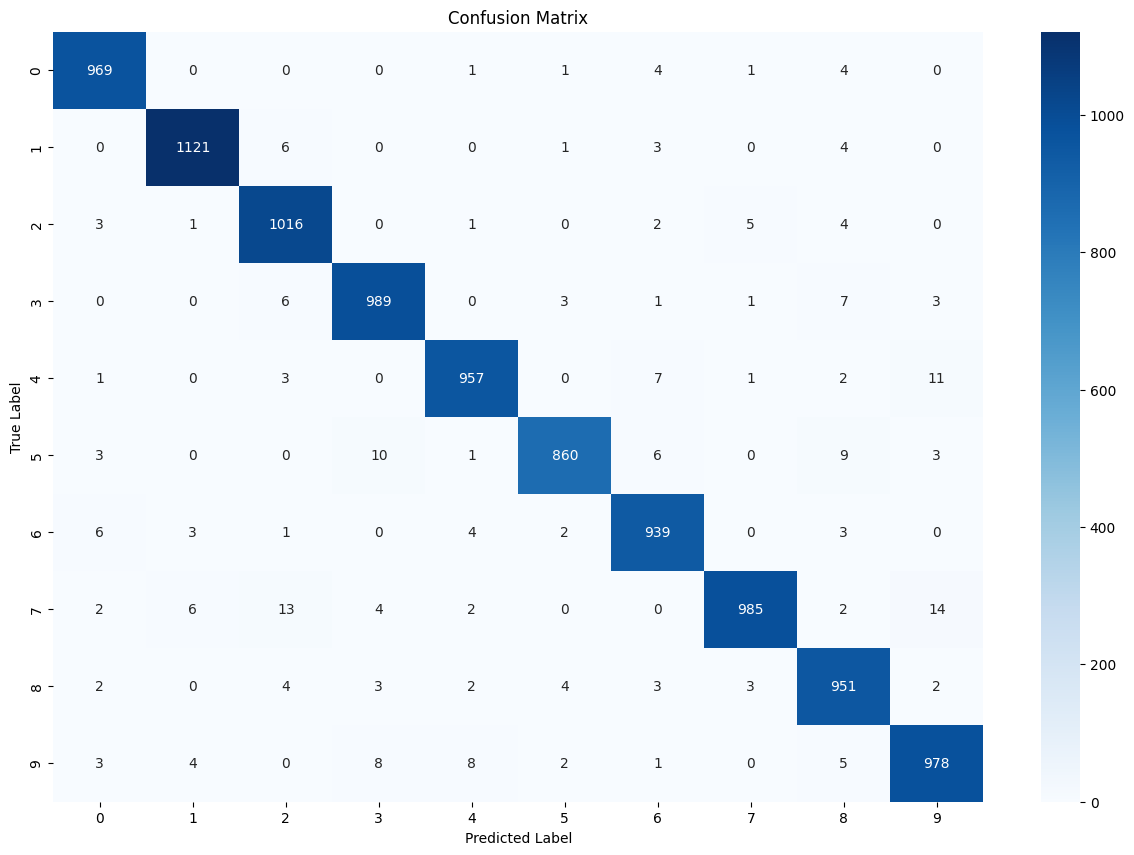

In [ ]:
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
#plotting
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(confusion_mtx,annot=True,fmt='d',ax=ax,cmap="Blues")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")
plt.show()

errors

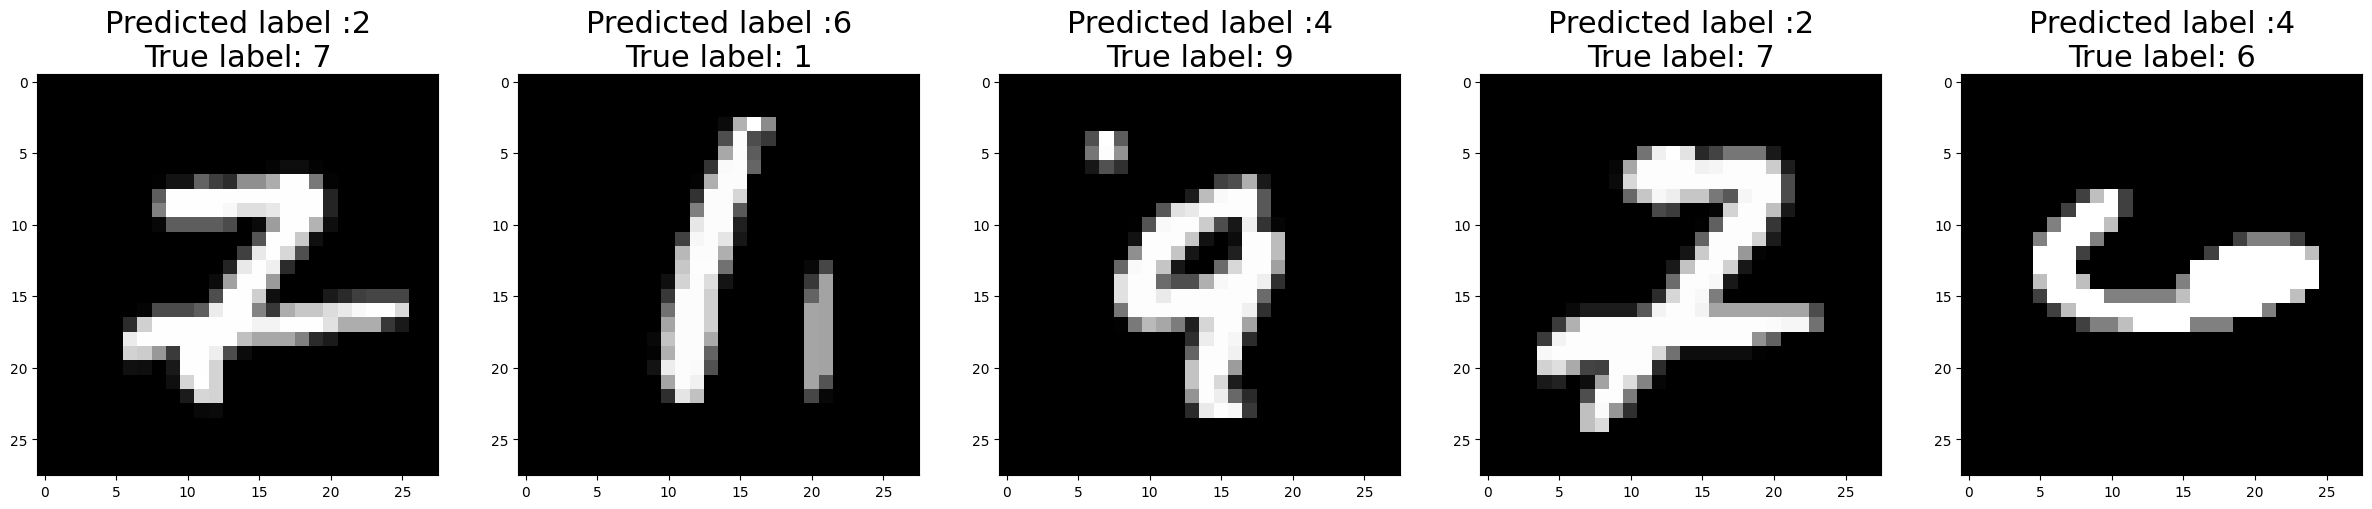

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]


y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones


# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)


In [ ]:
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9862 - loss: 0.0476 - val_accuracy: 0.9900 - val_loss: 0.0334
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9883 - loss: 0.0405 - val_accuracy: 0.9896 - val_loss: 0.0349
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9894 - loss: 0.0354 - val_accuracy: 0.9885 - val_loss: 0.0375
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9895 - loss: 0.0345 - val_accuracy: 0.9894 - val_loss: 0.0352
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9923 - loss: 0.0300 - val_accuracy: 0.9872 - val_loss: 0.0388
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9929 - loss: 0.0252 - val_accuracy: 0.9888 - val_loss: 0.0364
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9927 - loss: 0.0249 - val_accuracy: 0.9877 - val_loss: 0.0383
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9934 - loss: 0.0216 - val_accuracy: 0.9879 - v

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9955 - loss: 0.0160 - val_accuracy: 0.9868 - val_loss: 0.0407
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9958 - loss: 0.0156 - val_accuracy: 0.9868 - val_loss: 0.0453
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9966 - loss: 0.0130 - val_accuracy: 0.9872 - val_loss: 0.0433
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9973 - loss: 0.0105 - val_accuracy: 0.9870 - val_loss: 0.0460
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9967 - loss: 0.0120 - val_accuracy: 0.9868 - val_loss: 0.0449
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9978 - loss: 0.0092 - val_accuracy: 0.9879 - val_loss: 0.0446
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9974 - loss: 0.0097 - val_accuracy: 0.9853 - val_loss: 0.0480
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9972 - loss: 0.0103 - val_accuracy: 0.9864 - v

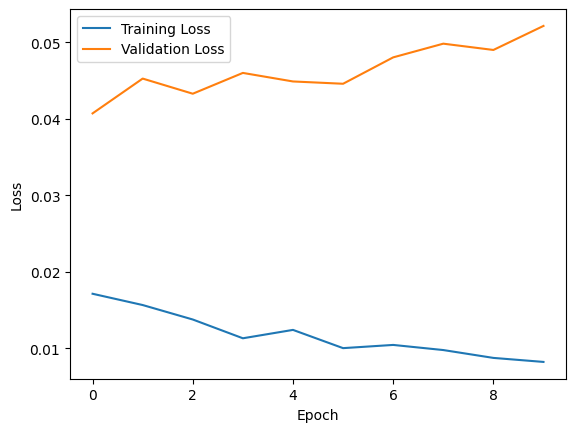

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
